# Importing Necessary Libraries

This cell imports essential libraries for numerical computations, plotting, time management, and image handling.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import time as Time
from IPython.display import display, clear_output
from PIL import Image

## Estimating k and $T_{\text{min}} $ Using Linear Regression  

In this step, we use linear regression to estimate the constants **k** and **T_min** in the equation:  

$
T = T_{\text{min}} + kI
$

where:  
- **I** represents intensity values obtained from external sources.  
- **T** represents air temperature values given in the project.  

Using least squares regression, we found:  
- **k = 0.0042**  
- **$T_{\text{min}}$ = 35.0831**  

The scatter plot shows the original data points, and the fitted line represents the linear model.


k = 0.0042
T_min = 35.5329


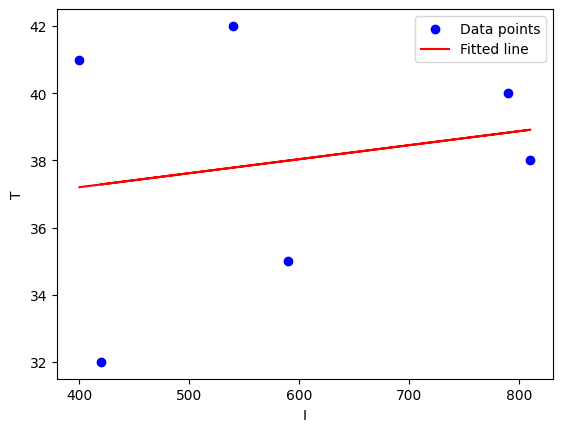

In [5]:
I = np.array([420, 590, 810, 790, 540, 400])
T = np.array([32, 35, 38, 40, 42, 41])

# Perform linear regression to find k and T_min considering T = T_min + k.I

A = np.vstack([I, np.ones(len(I))]).T
k, T_min = np.linalg.lstsq(A, T, rcond=None)[0]

print(f"k = {k:.4f}")
print(f"T_min = {T_min:.4f}")

# Plot the data points
plt.scatter(I, T, color='blue', label='Data points')

# Plot the fitted line
plt.plot(I, k * I + T_min, color='red', label='Fitted line')

plt.xlabel('I')
plt.ylabel('T')
plt.legend()
plt.show()

## Solar Position and Cube Visualization  

This section calculates the **solar altitude (α)** and **azimuth (γ) angles** based on:  
- **Latitude (la)**
- **Longitude (lo)**
- **Day of the year (N)**
- **Time of the day (hours)**  

The angles are determined using standard solar position equations.  

We then visualize:  
- **Top-down (XY plane)**: Sun’s position relative to a cube.  
- **Side view (XZ plane)**: Sun’s height in relation to the cube.  

This helps analyze sunlight exposure on different days. The animation updates every 20 days.


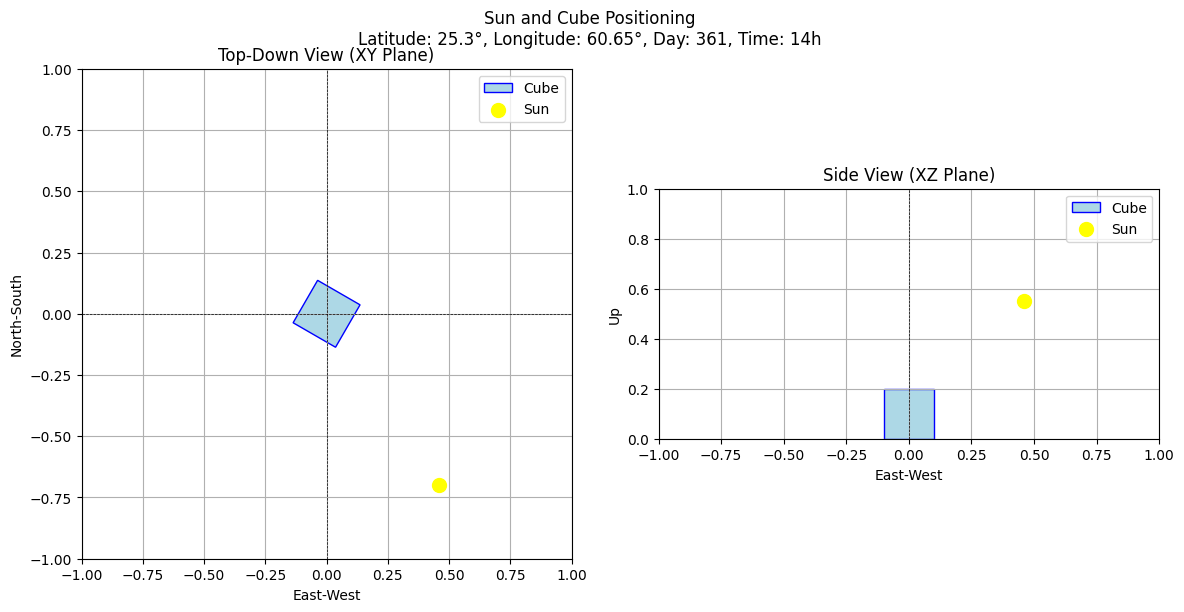

In [6]:
def solar_position(la, lo, N, time):
    """
    Calculate solar altitude and azimuth angles.
    """
    la_rad = np.radians(la)
    delta = np.radians(23.45 * np.sin(np.radians(360 * (284 + N) / 365)))
    omega = np.radians(15 * (time - 12))

    alpha = np.arcsin(np.sin(la_rad) * np.sin(delta) + np.cos(la_rad) * np.cos(delta) * np.cos(omega))
    gamma = np.arccos(np.clip((np.sin(delta) * np.cos(la_rad) - np.cos(delta) * np.sin(la_rad) * np.cos(omega)) / np.cos(alpha), -1, 1))

    return np.degrees(alpha), np.degrees(gamma)

def plot_sun_and_cube_2d(la, lo, N, theta, time):
    """
    Plot sun and cube positions in XY and XZ planes.
    """
    alpha, gamma = solar_position(la, lo, N, time)

    alpha_rad, gamma_rad, theta_rad = map(np.radians, [alpha, gamma, theta])

    # Sun's position in 2D space
    sun_x = np.cos(alpha_rad) * np.sin(gamma_rad)
    sun_y = np.cos(alpha_rad) * np.cos(gamma_rad)
    sun_z = np.sin(alpha_rad)

    cube_size = 0.2  

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # XY Plane (Top-Down View)
    ax1.add_patch(Rectangle((-cube_size/2, -cube_size/2), cube_size, cube_size, angle=theta,
                            rotation_point='center', edgecolor='blue', facecolor='lightblue', label='Cube'))
    ax1.scatter(sun_x, sun_y, color='yellow', s=100, label='Sun')
    ax1.set_title('Top-Down View (XY Plane)')

    # XZ Plane (Side View)
    ax2.add_patch(Rectangle((-cube_size/2, 0), cube_size, cube_size, edgecolor='blue', facecolor='lightblue', label='Cube'))
    ax2.scatter(sun_x, sun_z, color='yellow', s=100, label='Sun')
    ax2.set_title('Side View (XZ Plane)')

    # Formatting
    for ax, xlabel, ylabel in zip([ax1, ax2], ['East-West', 'East-West'], ['North-South', 'Up']):
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
        ax.axvline(0, color='black', linewidth=0.5, linestyle='--')
        ax.legend()
        ax.grid(True)
        ax.set_xlim([-1, 1])
        ax.set_ylim([-1, 1] if ax is ax1 else [0, 1])
        ax.set_aspect('equal')

    fig.suptitle(f"Sun and Cube Positioning\nLatitude: {la}°, Longitude: {lo}°, Day: {N}, Time: {time}h")

    plt.tight_layout()
    plt.show()

    Time.sleep(0.01)
    plt.close(fig)
    clear_output(wait=True)

# Example usage for Chabahar
la, lo, theta, time = 25.3, 60.65, 60, 14

for i in range(1, 365, 20):
    plot_sun_and_cube_2d(la, lo, i, theta, time)


# Sun and Cube Animation  

This script generates a GIF showing the sun's position relative to a cube over the course of a year.  

## Process Overview  
1. **Calculate Solar Position**:  
   - Using latitude, longitude, day of the year, and time of day.  
   - Computes altitude (`α`) and azimuth (`γ`) angles.  

2. **Plot Sun and Cube**:  
   - **Top-Down View (XY Plane)**: Shows east-west and north-south positioning.  
   - **Side View (XZ Plane)**: Displays the sun's height above the horizon.  

3. **Generate Frames**:  
   - Iterates through all 365 days.  
   - Saves each frame as an image.  

4. **Create GIF**:  
   - Combines images into an animated sequence.  

### Output  
A GIF (`sun_and_cube_animation.gif`) illustrating how the sun’s position changes throughout the year.  


In [ ]:
# Initialize frame list
frames = []
cube_size = 0.2

# Generate frames for each day
for day in range(1, 366):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    alpha, gamma = solar_position(la, lo, day, time)
    alpha_rad, gamma_rad = np.radians([alpha, gamma])

    # Sun's position
    sun_x, sun_y, sun_z = np.cos(alpha_rad) * np.sin(gamma_rad), np.cos(alpha_rad) * np.cos(gamma_rad), np.sin(alpha_rad)

    # XY (Top-Down) View
    ax1.scatter(sun_x, sun_y, color='yellow', s=100, label='Sun')
    ax1.add_patch(Rectangle((-cube_size/2, -cube_size/2), cube_size, cube_size, angle=theta,
                            edgecolor='blue', facecolor='lightblue', label='Cube'))
    ax1.set(xlabel='East-West', ylabel='North-South', title=f'Top-Down View (Day {day})', xlim=[-1, 1], ylim=[-1, 1])
    
    # XZ (Side) View
    ax2.scatter(sun_x, sun_z, color='yellow', s=100, label='Sun')
    ax2.add_patch(Rectangle((-cube_size/2, 0), cube_size, cube_size, edgecolor='blue', facecolor='lightblue', label='Cube'))
    ax2.set(xlabel='East-West', ylabel='Up', title=f'Side View (Day {day})', xlim=[-1, 1], ylim=[0, 1])

    for ax in (ax1, ax2):
        ax.axhline(0, color='black', linestyle='--', linewidth=0.5)
        ax.axvline(0, color='black', linestyle='--', linewidth=0.5)
        ax.legend()
        ax.grid(True)
        ax.set_aspect('equal')

    # Save frame
    frame_path = f'frame_{day:03d}.png'
    fig.savefig(frame_path, dpi=100, bbox_inches='tight')
    plt.close(fig)
    frames.append(Image.open(frame_path))

# Save as GIF
frames[0].save('sun_and_cube_animation.gif', save_all=True, append_images=frames[1:], duration=100, loop=0)

print("GIF created successfully!")

# Investigating Cube Temperature Based on Day of Year and Rotation Angle

This study explores how the temperature of a cube varies with:  
1. **Day of the Year (N)** – Examining seasonal effects on temperature.  
2. **Cube Rotation Angle (θ)** – Observing how orientation affects heat absorption.  

## 1️ Temperature Variation Over the Year 

- The left plot shows the cube's **temperature change over the year** (N = 1 to 365).  
- **Fixed Parameters:** Rotation angle (θ) = 30°, Time = 14h (2 PM).  
- The trend helps us understand how **seasonal variations** impact cube heating.  

**Key Observations:**  
- Temperature follows a **sinusoidal pattern**, peaking in summer and dropping in winter.  
- The cube's exposure to sunlight shifts throughout the year, affecting absorbed energy.  

---

## 2️ Temperature Variation with Cube Rotation   

- The right plot investigates how the cube’s **rotation angle (θ)** influences temperature.  
- **Fixed Parameters:** Day = 180 (mid-year), Time = 14h.  
- The cube rotates **from 0° to 360°**, showing how different orientations absorb sunlight.  

**Key Observations:**  
- Some angles receive **maximum** solar exposure, leading to higher temperatures.  
- Others **reflect more light**, reducing heat absorption.  
- The temperature curve highlights **optimal orientations** for heat absorption.  

---

##  Conclusion  

- **Seasonal effects** significantly impact temperature variations over the year.  
- **Cube rotation plays a critical role** in controlling heat absorption.  
- This analysis can help optimize **solar panel orientation** or **thermal management strategies** for different seasons.  


Cube temperature at day 180, theta 45, and time 14h: 62.78°C


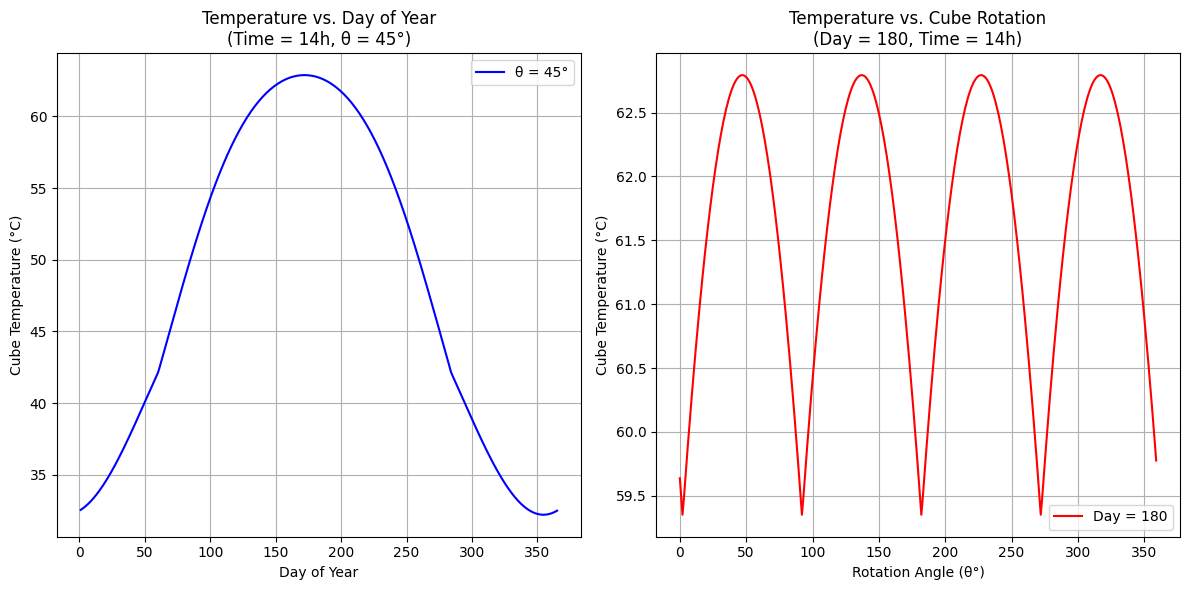

In [11]:
def solar_position(la, lo, N, time):
    la_rad = np.radians(la)
    delta = np.radians(23.45 * np.sin(np.radians(360 * (284 + N) / 365)))
    omega = np.radians(15 * (time - 12))
    alpha = np.arcsin(np.sin(la_rad) * np.sin(delta) + np.cos(la_rad) * np.cos(delta) * np.cos(omega))
    gamma = np.arccos(np.clip((np.sin(delta) * np.cos(la_rad) - np.cos(delta) * np.sin(la_rad) * np.cos(omega)) / np.cos(alpha), -1, 1))

    return np.degrees(alpha), np.degrees(gamma)

def solar_radiation(alpha):
    S0 = 1361  # Solar constant (W/m^2)
    if alpha > 0:
        return S0 * np.sin(np.radians(alpha)) * 0.75  # Adjusted for atmospheric losses
    return 0

def rotate_vector(vector, theta):
    """Rotate a 2D vector (x, y) by theta degrees counterclockwise."""
    theta_rad = np.radians(theta)
    rotation_matrix = np.array([
        [np.cos(theta_rad), -np.sin(theta_rad)],
        [np.sin(theta_rad), np.cos(theta_rad)]
    ])
    return np.dot(rotation_matrix, vector)

def cube_temperature(N, theta, time, la=25.3, lo=60.65, h=10):
    alpha, gamma = solar_position(la, lo, N, time)
    S = solar_radiation(alpha)  # Total radiation
    
    # Define original unrotated surface normals
    surfaces = {
        "top": np.array([0, 0, 1]),
        "south": np.array([0, -1, 0]),
        "north": np.array([0, 1, 0]),
        "east": np.array([1, 0, 0]),
        "west": np.array([-1, 0, 0])
    }
    
    # Apply rotation to vertical faces
    for face in ["south", "north", "east", "west"]:
        rotated_normal = rotate_vector(surfaces[face][:2], theta)
        surfaces[face] = np.array([rotated_normal[0], rotated_normal[1], 0])
    
    sun_dir = np.array([
        np.cos(np.radians(alpha)) * np.sin(np.radians(gamma)),
        np.cos(np.radians(alpha)) * np.cos(np.radians(gamma)),
        np.sin(np.radians(alpha))
    ])
    
    absorbed_radiation = {}
    absorption_coefficient = 0.2  # Adjusted absorption coefficient
    for face, normal in surfaces.items():
        cos_theta = np.dot(sun_dir, normal)
        absorbed_radiation[face] = max(0, S * cos_theta * absorption_coefficient)
    
    total_absorbed = sum(absorbed_radiation.values())
    
    T_air_avg = 20 + 10 * np.cos(2 * np.pi * (N - 172) / 365)  # Seasonal variation
    T_air_hourly = T_air_avg + 5 * np.cos(2 * np.pi * (time - 14) / 24)  # Hourly variation
    
    T_cube = T_air_hourly + (total_absorbed / h)

    return T_cube

# Example Usage
day = 180  # Mid-year
theta = 45
time = 14  # Noon
temp = cube_temperature(day, theta, time)
print(f"Cube temperature at day {day}, theta {theta}, and time {time}h: {temp:.2f}°C")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Investigating temperature variation with day of the year
N = np.arange(1, 366)
T = [cube_temperature(n, theta, time) for n in N]

ax1.plot(N, T, color='blue', label=f'θ = {theta}°')
ax1.set_xlabel('Day of Year')
ax1.set_ylabel('Cube Temperature (°C)')
ax1.set_title(f'Temperature vs. Day of Year\n(Time = {time}h, θ = {theta}°)')
ax1.legend()
ax1.grid(True)

# Investigating temperature variation with cube rotation (theta)
Th = np.arange(0, 360)
T2 = [cube_temperature(day, th, time) for th in Th]

ax2.plot(Th, T2, color='red', label=f'Day = {day}')
ax2.set_xlabel('Rotation Angle (θ°)')
ax2.set_ylabel('Cube Temperature (°C)')
ax2.set_title(f'Temperature vs. Cube Rotation\n(Day = {day}, Time = {time}h)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()
